In [ ]:
# Connect to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/edurekaai/_data/samples/cancer.csv')
df.info()
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# 1. Missing Value Ratio

In [ ]:
# Missing Value Ratio
df.isnull().sum()/len(df)*100


,0
id,0.0
diagnosis,0.0
radius_mean,0.0
texture_mean,0.0
perimeter_mean,0.0
area_mean,0.0
smoothness_mean,0.0
compactness_mean,0.0
concavity_mean,0.0
concave points_mean,0.0


In [ ]:
# Eliminate the Feature (Unnamed: 32) which has 100% null value
df.drop('Unnamed: 32', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# 2. High Correlation Filter

In [ ]:
# High Correlation Filter
## Elimate the features which are highly-corelated. In that case, there is no point of keeping them all in the analysis.
## You should keep one of them only in the dataset for machine learning.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

<Axes: >

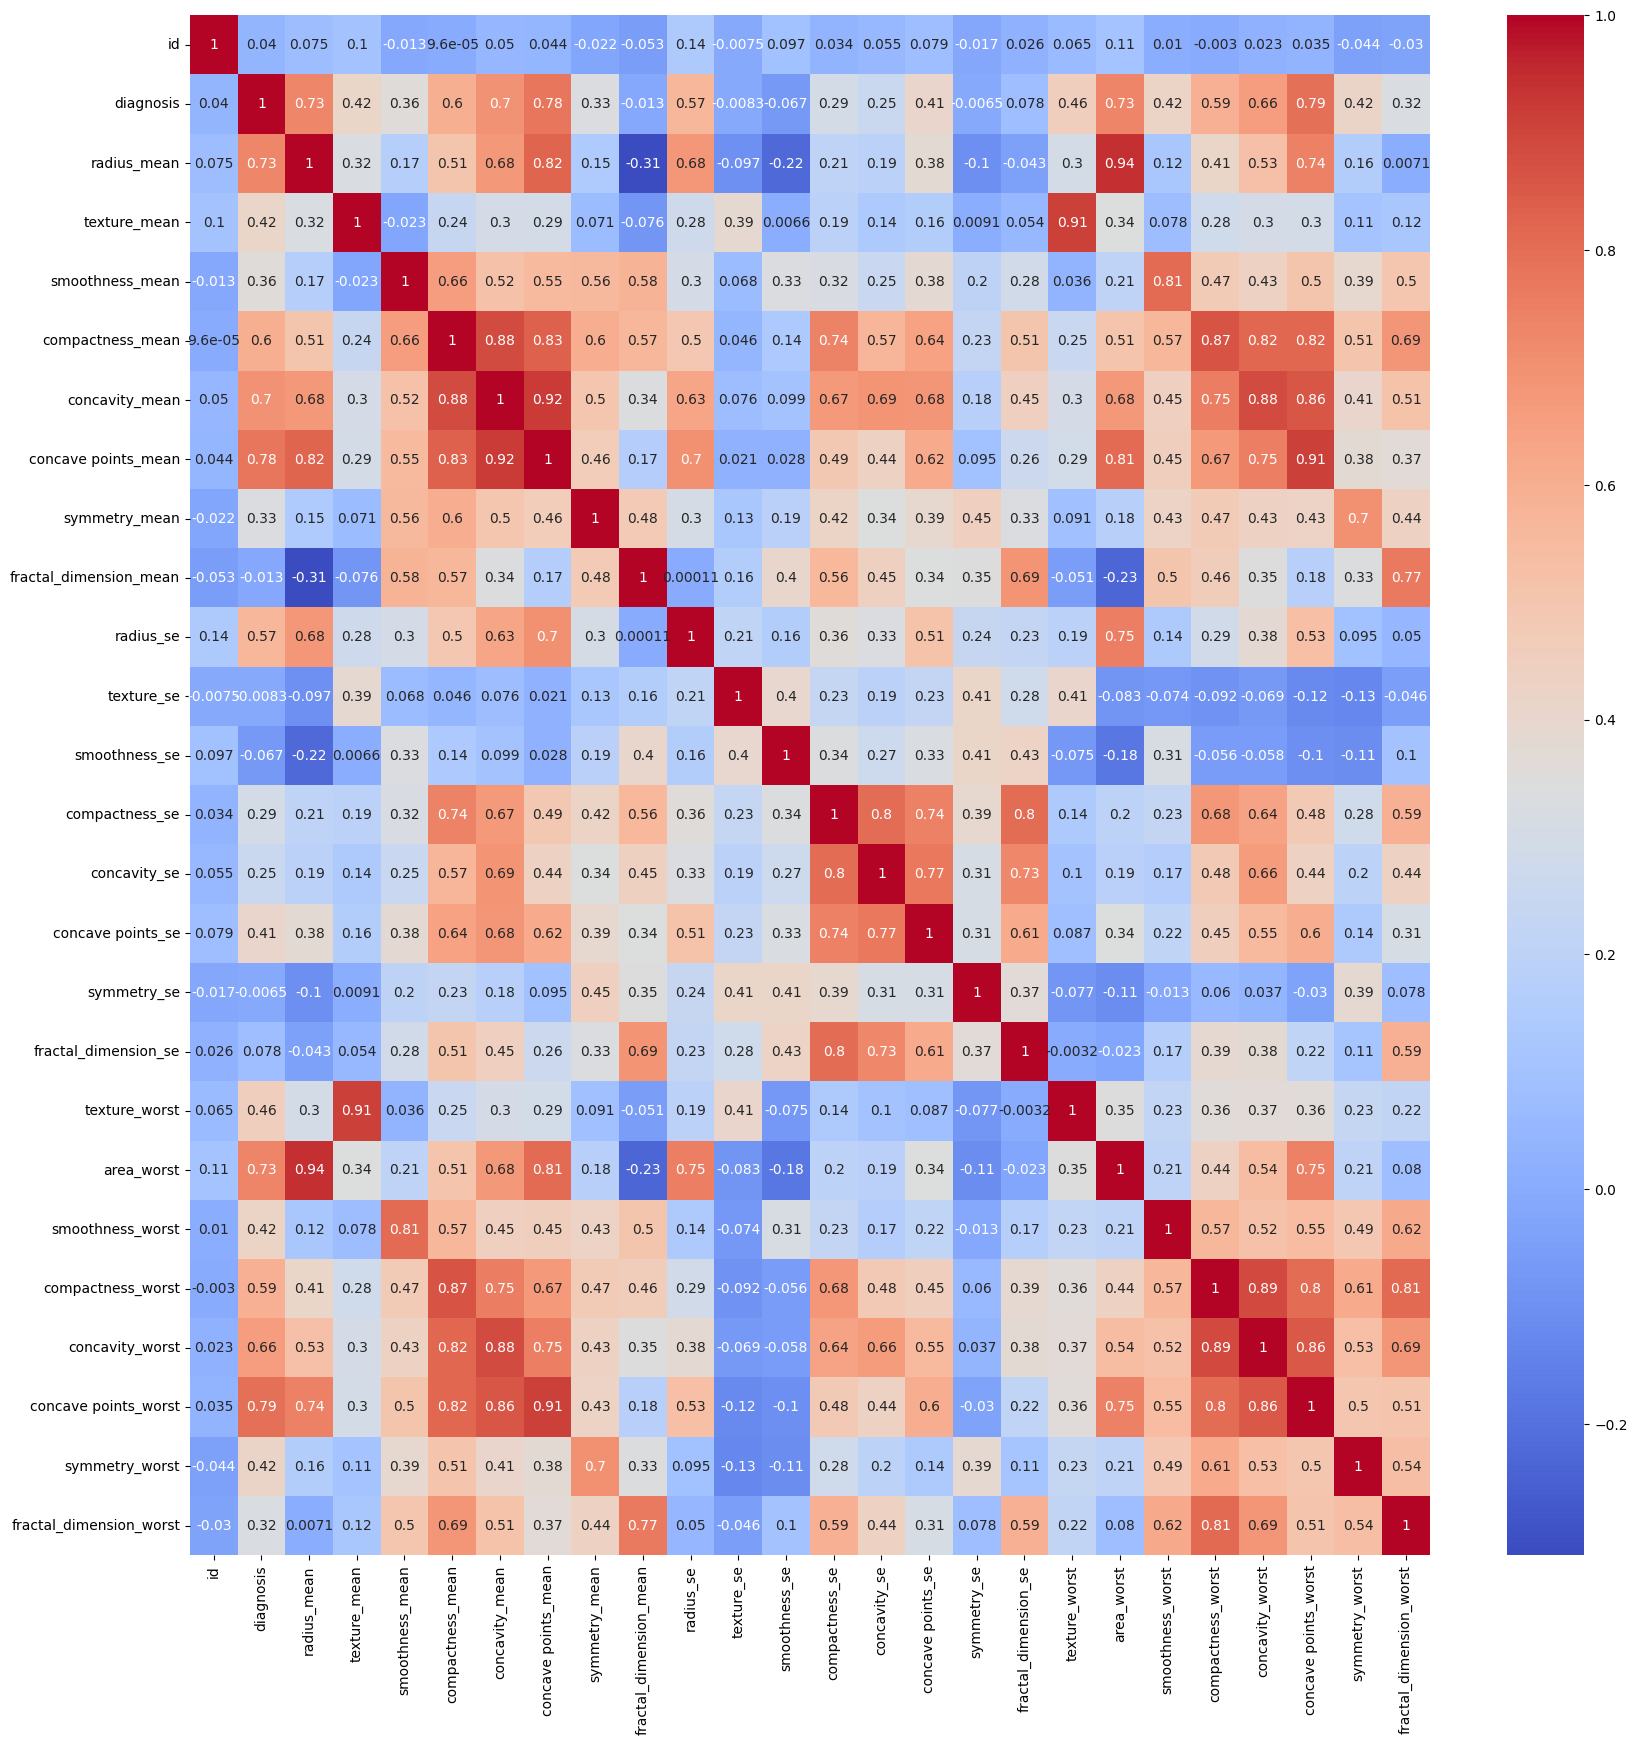

In [ ]:
# Finding High Correlation using Heatmap
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Heatmap shows the red ones are highly corelated. the corelation lessens from RED(1) to BLUE(0).

In [ ]:
# Finding High Correlation using correlation index
x_cor = df.corr() > 0.95

# Filter and show only the co-related ones
x_cor[x_cor==True]
# # show where the row and column name is not the same
# x_cor[x_cor==True].index


,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diagnosis,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
texture_mean,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoothness_mean,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
compactness_mean,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concave points_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fractal_dimension_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Find the radius_mean corelations.
x_cor['radius_mean']
# It shows radius_mean is highly-corelated with perimeter_mean, area_mean, radius_worst, perimeter_worst

,radius_mean
id,False
diagnosis,False
radius_mean,True
texture_mean,False
perimeter_mean,True
area_mean,True
smoothness_mean,False
compactness_mean,False
concavity_mean,False
concave points_mean,False


In [ ]:
# Drop the highly corelated features
df.drop(['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [ ]:
# Find the radius_se corelations.
x_cor['radius_se']

,radius_se
id,False
diagnosis,False
radius_mean,False
texture_mean,False
perimeter_mean,False
area_mean,False
smoothness_mean,False
compactness_mean,False
concavity_mean,False
concave points_mean,False


In [ ]:
# Drop the highly corelated features
df.drop(['area_se', 'perimeter_se'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  smoothness_se            569 non-null    float64
 13  compactness_se           569 non-null    float64
 14  concavity_se             5

# 3. Random Forest Algorithm (Find Important Features)
Train a model using Random Forest to find out insignificant features.




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
# Create Train and Test Data
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

# Find the Feature Importances
rf_model.feature_importances_
df_imp_features = pd.DataFrame({'features':x.columns, 'importance': rf_model.feature_importances_})
df_imp_features.sort_values(by='importance', ascending=False)

,features,importance
18,area_worst,0.238789
6,concave points_mean,0.145341
22,concave points_worst,0.138597
1,radius_mean,0.091144
21,concavity_worst,0.069916
5,concavity_mean,0.060964
9,radius_se,0.039081
20,compactness_worst,0.032901
17,texture_worst,0.029918
4,compactness_mean,0.024285


<Axes: xlabel='features'>

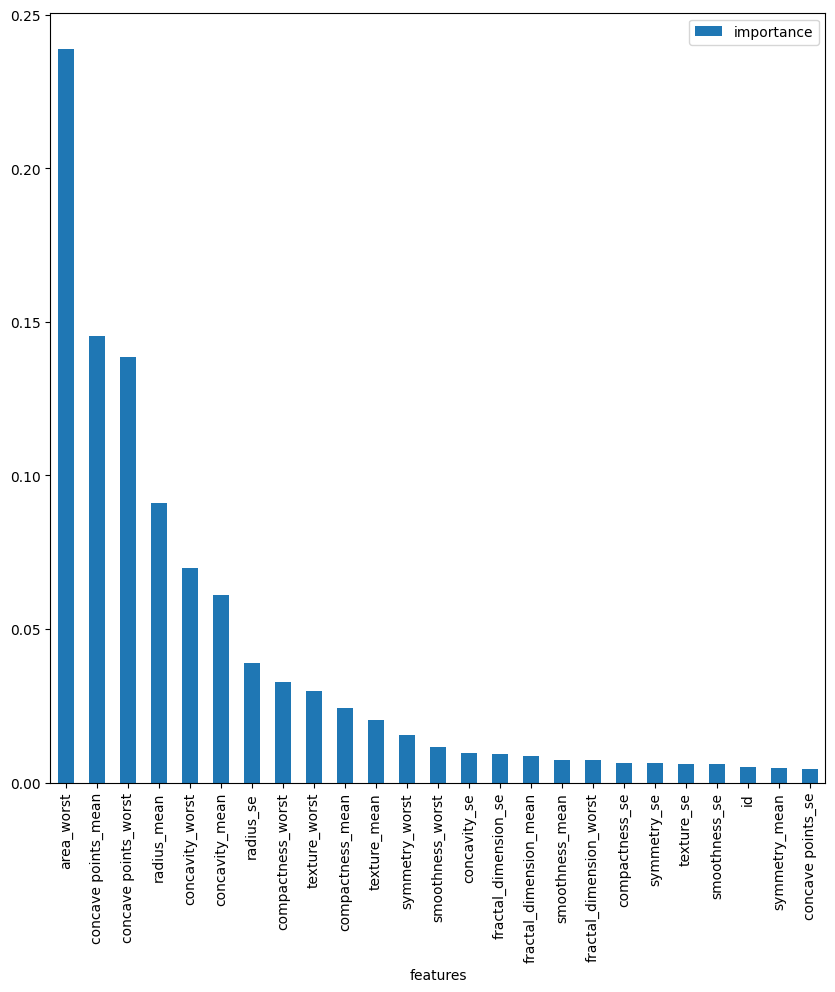

In [ ]:
df_imp_features.sort_values(by='importance', ascending=False).plot(kind='bar', x='features', y='importance', figsize=(10,10))

# 4. PCA (Principal Component Analysis) - Dimensionality Reduction.
**Principal Component Analysis (PCA)** is a widely used dimensionality reduction technique in machine learning and data analysis. It helps ***simplify datasets with many features by reducing the number of variables*** while preserving as much of the original variance (information) as possible.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/edurekaai/_data/samples/winedata.csv')
df.head(5)

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


In [ ]:
df.rename(columns={'Wine': 'Customer_Segment'}, inplace=True)
df.rename(columns={'OD280/OD315 of diluted wines': 'OD280'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Alcalinity of ash     178 non-null    float64
 4   Magnesium             178 non-null    float64
 5   Total phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    float64
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 19.6 KB


In [ ]:
# Segrgrate Independent and Dependent Features
X = df.drop('Customer_Segment', axis=1)
y = df['Customer_Segment']

In [ ]:
# Scale the data to bring them to a standrd measuring scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #It also removes the header from the data and convert to nparray
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
# Apply PCA
pca = PCA(n_components=5) #you specify how many components or PCs you need as output
X_pca = pca.fit_transform(X_scaled)
X_pca #prints only n_components columns

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01,
        -2.15631188e-01,  6.93042841e-01],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00,
        -2.91358318e-01, -2.57654635e-01],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01,
         7.24902309e-01, -2.51033118e-01],
       [ 3.75706561e+00,  2.75637191e+00, -1.76191842e-01,
         5.67983308e-01, -3.11841591e-01],
       [ 1.00890849e+00,  8.69830821e-01,  2.02668822e+00,
        -4.09765788e-01,  2.98457503e-01],
       [ 3.05025392e+00,  2.12240111e+00, -6.29395827e-01,
        -5.15637495e-01, -6.32018734e-01],
       [ 2.44908967e+00,  1.17485013e+00, -9.77094891e-01,
        -6.58305046e-02, -1.02776191e+00],
       [ 2.05943687e+00,  1.60896307e+00,  1.46281883e-01,
        -1.19260801e+00,  7.69034938e-02],
       [ 2.51087430e+00,  9.18070957e-01, -1.77096903e+00,
         5.62703612e-02, -8.92256977e-01],
       [ 2.75362819e+00,  7.89437674e-01, -9.84247490e-01,
         3.49381568e-01

In [ ]:
# Checking explained variance in the PCA
print(pca.explained_variance_ratio_)

#Our plan should be to define enough PCA components (n_components) so that this sum is close to 1. Or at least more than 75%.
# Through hit-and-trial, you will have to find the right value for n_components.
print("Total Variance Explained is: ", pca.explained_variance_ratio_.sum())

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294]
Total Variance Explained is:  0.8016229275554787


In [ ]:
# Show the columns and its amount of contribution to PCA components
# Column1 shows the PC# (PC1, PC2, PC3, etc....)
df_components=pd.DataFrame(pca.components_,columns=X.columns)
df_components

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
1,0.483652,0.224931,0.316069,-0.010591,0.299634,0.065040,-0.003360,0.028779,0.039302,0.529996,-0.279235,-0.164496,0.364903
2,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
3,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
4,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869


# 5. Another PCA Demo using Iris Dataset
Objective:
- Do the machine learning on the entire feature list without Dimensionality Reduction
- Do the machine learning on selected features with Dimensionality Reduction
- Compare the classification Report from both.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/edurekaai/_data/samples/Iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Segrgrate Independent and Dependent features
df_iris = df.copy()
df_iris.drop('Id', axis=1, inplace=True)
df_iris.head(5)
X = df_iris.drop('Species', axis=1)
y = df_iris['Species']

In [ ]:
# Label Encoding for target and standard scalling for feature
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_encoded = le.fit_transform(y)
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Split the train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

In [ ]:
# Train the Model (using all 4 features)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
rf_model = DecisionTreeClassifier(random_state=42)
rf_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report

# Print Classification Report on the Model Prediction (on known data)
y_pred_train = rf_model.predict(x_train)
print(classification_report(y_train, y_pred_train))

# Print Classification Report on the Model Prediction (on unknown data)
y_pred_test = rf_model.predict(x_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



### Conclusion
Accuracy difference is very mininal between the train and test data. It means the model is performing well.

## Run the Test Again with PCA
We will reduce the 4 features to 2 PC (primary component) feature using PCA

In [ ]:
# Apply PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)
X_pca
#
print(pca.explained_variance_ratio_)
print("Total Variance Explained is: ", pca.explained_variance_ratio_.sum())
#

[0.92461621 0.05301557]
Total Variance Explained is:  0.9776317750248062


In [ ]:
# Split the train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.3, random_state=42)

In [ ]:
# Train the Model (using all 2 PCs)
rf_model_pca = DecisionTreeClassifier(random_state=42)
rf_model_pca.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report

# Print Classification Report on the Model Prediction (on known data)
y_pred_train = rf_model_pca.predict(x_train)
print(classification_report(y_train, y_pred_train))

# Print Classification Report on the Model Prediction (on unknown data)
y_pred_test = rf_model_pca.predict(x_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



### Conclusion
You could see here the **accuracy** has not changed. Rather it has improved on the unknown data. It means, performing the machine learning with dimensionality reduction is better. It also requires less machine resources since you have to train the model on less data.